In [1]:
import  json
import requests
import pandas as pd
import numpy as np
import os,shutil

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amird\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amird\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## code to break out law type in map

In [2]:
f = open("map.txt", "r")
content = f.read()
content

"1 -> Administrative Law\n2 -> Admiralty\n3 -> Agriculture\n4 -> Antitrust &amp; Trade Regulation\n5 -> Attorney's Fees\n6 -> Banking Law\n7 -> Bankruptcy Law\n8 -> Civil Procedure\n9 -> Civil Rights\n10 -> Class Actions\n11 -> Commercial Law\n12 -> Communications Law\n13 -> Constitutional Law\n14 -> Construction\n15 -> Consumer Protection Law\n16 -> Contracts\n17 -> Corp. Governance\n18 -> Corporation &amp; Enterprise Law\n19 -> Criminal Law &amp; Procedure\n20 -> Habeas Corpus\n21 -> Sentencing\n22 -> Cyberspace Law\n23 -> Debt Collection\n24 -> Dispute Resolution &amp; Arbitration\n25 -> Drugs &amp; Biotech\n31 -> ERISA\n26 -> Education Law\n27 -> Elder Law\n28 -> Elections\n29 -> Entertainment Law\n30 -> Environmental Law\n32 -> Ethics &amp; Disciplinary Code\n33 -> Ethics &amp; Professional Responsibility\n34 -> Evidence\n35 -> False Advertising\n36 -> Family Law\n37 -> Gaming Law\n38 -> Government Benefits\n39 -> Government Contracts\n40 -> Government Law\n41 -> Health Law\n42 ->

In [3]:
lawcat=content.splitlines()
f.close()
lawcat

['1 -> Administrative Law',
 '2 -> Admiralty',
 '3 -> Agriculture',
 '4 -> Antitrust &amp; Trade Regulation',
 "5 -> Attorney's Fees",
 '6 -> Banking Law',
 '7 -> Bankruptcy Law',
 '8 -> Civil Procedure',
 '9 -> Civil Rights',
 '10 -> Class Actions',
 '11 -> Commercial Law',
 '12 -> Communications Law',
 '13 -> Constitutional Law',
 '14 -> Construction',
 '15 -> Consumer Protection Law',
 '16 -> Contracts',
 '17 -> Corp. Governance',
 '18 -> Corporation &amp; Enterprise Law',
 '19 -> Criminal Law &amp; Procedure',
 '20 -> Habeas Corpus',
 '21 -> Sentencing',
 '22 -> Cyberspace Law',
 '23 -> Debt Collection',
 '24 -> Dispute Resolution &amp; Arbitration',
 '25 -> Drugs &amp; Biotech',
 '31 -> ERISA',
 '26 -> Education Law',
 '27 -> Elder Law',
 '28 -> Elections',
 '29 -> Entertainment Law',
 '30 -> Environmental Law',
 '32 -> Ethics &amp; Disciplinary Code',
 '33 -> Ethics &amp; Professional Responsibility',
 '34 -> Evidence',
 '35 -> False Advertising',
 '36 -> Family Law',
 '37 -> Gam

In [4]:
catagories=[]
for itemset in lawcat:
    meepset=itemset.partition('->')
    print(meepset)
    print(meepset[2])
    catagories.append(meepset)

('1 ', '->', ' Administrative Law')
 Administrative Law
('2 ', '->', ' Admiralty')
 Admiralty
('3 ', '->', ' Agriculture')
 Agriculture
('4 ', '->', ' Antitrust &amp; Trade Regulation')
 Antitrust &amp; Trade Regulation
('5 ', '->', " Attorney's Fees")
 Attorney's Fees
('6 ', '->', ' Banking Law')
 Banking Law
('7 ', '->', ' Bankruptcy Law')
 Bankruptcy Law
('8 ', '->', ' Civil Procedure')
 Civil Procedure
('9 ', '->', ' Civil Rights')
 Civil Rights
('10 ', '->', ' Class Actions')
 Class Actions
('11 ', '->', ' Commercial Law')
 Commercial Law
('12 ', '->', ' Communications Law')
 Communications Law
('13 ', '->', ' Constitutional Law')
 Constitutional Law
('14 ', '->', ' Construction')
 Construction
('15 ', '->', ' Consumer Protection Law')
 Consumer Protection Law
('16 ', '->', ' Contracts')
 Contracts
('17 ', '->', ' Corp. Governance')
 Corp. Governance
('18 ', '->', ' Corporation &amp; Enterprise Law')
 Corporation &amp; Enterprise Law
('19 ', '->', ' Criminal Law &amp; Procedure')


In [5]:
catagories

[('1 ', '->', ' Administrative Law'),
 ('2 ', '->', ' Admiralty'),
 ('3 ', '->', ' Agriculture'),
 ('4 ', '->', ' Antitrust &amp; Trade Regulation'),
 ('5 ', '->', " Attorney's Fees"),
 ('6 ', '->', ' Banking Law'),
 ('7 ', '->', ' Bankruptcy Law'),
 ('8 ', '->', ' Civil Procedure'),
 ('9 ', '->', ' Civil Rights'),
 ('10 ', '->', ' Class Actions'),
 ('11 ', '->', ' Commercial Law'),
 ('12 ', '->', ' Communications Law'),
 ('13 ', '->', ' Constitutional Law'),
 ('14 ', '->', ' Construction'),
 ('15 ', '->', ' Consumer Protection Law'),
 ('16 ', '->', ' Contracts'),
 ('17 ', '->', ' Corp. Governance'),
 ('18 ', '->', ' Corporation &amp; Enterprise Law'),
 ('19 ', '->', ' Criminal Law &amp; Procedure'),
 ('20 ', '->', ' Habeas Corpus'),
 ('21 ', '->', ' Sentencing'),
 ('22 ', '->', ' Cyberspace Law'),
 ('23 ', '->', ' Debt Collection'),
 ('24 ', '->', ' Dispute Resolution &amp; Arbitration'),
 ('25 ', '->', ' Drugs &amp; Biotech'),
 ('31 ', '->', ' ERISA'),
 ('26 ', '->', ' Education Law'

In [6]:
data=pd.DataFrame(columns=['case_text','case_type'])

In [7]:
main_directory=os.getcwd()

pathToText='raw_cases\\raw_cases'

In [8]:
path=os.path.join(main_directory,pathToText)

In [9]:
masterpath=os.listdir(path)

In [10]:
counterfordocuments=1

for folder in masterpath[:-1]:
    subfile=os.listdir(os.path.join(path,folder))
    for rawtext in subfile:
        with open(os.path.join(path,folder)+'/' +rawtext,'r',encoding='utf-8') as f:
            content=f.read()
            vardict=pd.DataFrame({'case_text':content,'case_type':folder},index=[counterfordocuments])
            data=data.append(vardict)
            counterfordocuments+= 1

# remap numbers to text

In [11]:
law_cat_map={}
for item in catagories:
    law_cat_map[item[0].strip()]=item[2]

In [12]:
law_cat_map

{'1': ' Administrative Law',
 '2': ' Admiralty',
 '3': ' Agriculture',
 '4': ' Antitrust &amp; Trade Regulation',
 '5': " Attorney's Fees",
 '6': ' Banking Law',
 '7': ' Bankruptcy Law',
 '8': ' Civil Procedure',
 '9': ' Civil Rights',
 '10': ' Class Actions',
 '11': ' Commercial Law',
 '12': ' Communications Law',
 '13': ' Constitutional Law',
 '14': ' Construction',
 '15': ' Consumer Protection Law',
 '16': ' Contracts',
 '17': ' Corp. Governance',
 '18': ' Corporation &amp; Enterprise Law',
 '19': ' Criminal Law &amp; Procedure',
 '20': ' Habeas Corpus',
 '21': ' Sentencing',
 '22': ' Cyberspace Law',
 '23': ' Debt Collection',
 '24': ' Dispute Resolution &amp; Arbitration',
 '25': ' Drugs &amp; Biotech',
 '31': ' ERISA',
 '26': ' Education Law',
 '27': ' Elder Law',
 '28': ' Elections',
 '29': ' Entertainment Law',
 '30': ' Environmental Law',
 '32': ' Ethics &amp; Disciplinary Code',
 '33': ' Ethics &amp; Professional Responsibility',
 '34': ' Evidence',
 '35': ' False Advertising

In [13]:
law_type_df=data.replace({'case_type':law_cat_map})


In [14]:
law_type_df.groupby(['case_type']).count().sort_values(by=['case_text'],ascending=False)

,case_text
case_type,
Immigration Law,2332
Insurance Law,1569
Habeas Corpus,1511
Health Law,1455
Family Law,1203
...,...
Tax-exempt Organizations,74
Judges &amp; Judiciary,65
Legal Malpractice,61


<AxesSubplot:ylabel='case_type'>

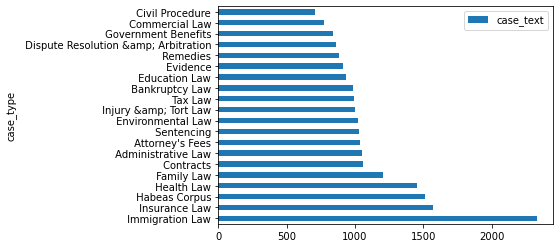

In [15]:
law_type_df.groupby(['case_type']).count().sort_values(by=['case_text'],ascending=False)[0:20].plot(kind='barh')

In [16]:
forcasename=law_type_df.groupby(['case_type']).count().sort_values(by=['case_text'],ascending=False)[0:20]

In [17]:
caselist20=list(forcasename.index)

In [18]:
data_frame20=pd.DataFrame(columns=['case_text','case_type'])
for casetype in caselist20:
    tempval=law_type_df[law_type_df.case_type==casetype]
    data_frame20=data_frame20.append(tempval)




In [19]:
data_frame20

,case_text,case_type
20813,"Any alien convicted of an ""aggravated felony"" ...",Immigration Law
20814,"Petitioner Moones Mellouli, a lawful permanent...",Immigration Law
20815,Before passage of the Illegal Immigration Refo...,Immigration Law
20816,"Petitioner Alexon Nassaralla Lamim, a native a...",Immigration Law
20817,"Plaintiff-appellant, Kai Tung Chan, appeals fr...",Immigration Law
...,...,...
38285,The parties-who agree on little else-mutually ...,Civil Procedure
38286,This case involves the power of a district cou...,Civil Procedure
38287,Non-party appellants Stone & Webster Engineeri...,Civil Procedure
38288,"On October 8, 1999, plaintiff-appellant José A...",Civil Procedure


# check point

In [20]:
data_frame20.case_type.value_counts()

 Immigration Law                         2332
 Insurance Law                           1569
 Habeas Corpus                           1511
 Health Law                              1455
 Family Law                              1203
 Contracts                               1059
 Administrative Law                      1053
 Attorney's Fees                         1034
 Sentencing                              1032
 Environmental Law                       1024
 Injury &amp; Tort Law                   1000
 Tax Law                                  991
 Bankruptcy Law                           988
 Education Law                            936
 Evidence                                 912
 Remedies                                 883
 Dispute Resolution &amp; Arbitration     864
 Government Benefits                      836
 Commercial Law                           771
 Civil Procedure                          709
Name: case_type, dtype: int64

In [21]:
for classcount in data_frame20.case_type.value_counts():
    print(classcount)

2332
1569
1511
1455
1203
1059
1053
1034
1032
1024
1000
991
988
936
912
883
864
836
771
709


In [22]:
textdata=data_frame20['case_text']
target = data_frame20['case_type']

In [23]:
textdata

20813    Any alien convicted of an "aggravated felony" ...
20814    Petitioner Moones Mellouli, a lawful permanent...
20815    Before passage of the Illegal Immigration Refo...
20816    Petitioner Alexon Nassaralla Lamim, a native a...
20817    Plaintiff-appellant, Kai Tung Chan, appeals fr...
                               ...                        
38285    The parties-who agree on little else-mutually ...
38286    This case involves the power of a district cou...
38287    Non-party appellants Stone & Webster Engineeri...
38288    On October 8, 1999, plaintiff-appellant José A...
38289    Under the authority of the Magnuson-Stevens Ac...
Name: case_text, Length: 22162, dtype: object

In [24]:
data.head()

,case_text,case_type
1,Petitioner Jhonatan Acosta (“Acosta”) petition...,1
2,OPINION\nAnthony Araujo filed a complaint in t...,1
3,OPINION\nRobert Zimmerman was riding his motor...,1
4,OPINION\nThis case returns to us after the Sup...,1
5,"OPINION OF THE COURT\nHaddrick Byrd, a prisone...",1


# break up for relevant information

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_frame20['case_text'])

text_tf_tfigf=pd.DataFrame(text_tf.todense(),columns = tf.get_feature_names())

In [27]:
relevant = pd.DataFrame()
for word in text_tf_tfigf.columns:
    if text_tf_tfigf[word].mean() > 0.01:
        relevant[word]=text_tf_tfigf[word]
len(relevant)

22162

In [28]:
relevant

,2d,3d,an,and,any,arbitration,are,as,at,bankruptcy,...,to,trial,under,united,was,we,were,which,with,would
0,0.001509,0.013696,0.094073,0.111881,0.015816,0.0,0.026724,0.081556,0.049251,0.000000,...,0.168512,0.002236,0.021216,0.040760,0.012477,0.020153,0.000742,0.032232,0.021480,0.039353
1,0.000000,0.003522,0.043941,0.077619,0.034251,0.0,0.010588,0.070080,0.068642,0.000000,...,0.200798,0.000000,0.050109,0.015155,0.027098,0.015281,0.005440,0.030816,0.032166,0.016025
2,0.003420,0.009804,0.038416,0.095497,0.015481,0.0,0.009005,0.048568,0.073905,0.000000,...,0.201169,0.005068,0.021642,0.067288,0.025141,0.014965,0.010095,0.015884,0.014922,0.025606
3,0.002510,0.009593,0.004603,0.036765,0.004784,0.0,0.002403,0.013797,0.004616,0.000000,...,0.091912,0.000000,0.002353,0.008844,0.023063,0.011561,0.004939,0.004663,0.032275,0.002425
4,0.027482,0.033424,0.041236,0.098354,0.016667,0.0,0.007176,0.025180,0.034462,0.000000,...,0.128089,0.000000,0.021080,0.052824,0.029845,0.011508,0.000000,0.020886,0.013769,0.009655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22157,0.031481,0.030083,0.039364,0.068123,0.013637,0.0,0.013701,0.005244,0.055266,0.000000,...,0.144107,0.000000,0.002683,0.040340,0.026298,0.055366,0.000000,0.039875,0.034174,0.024884
22158,0.010331,0.007404,0.033157,0.096949,0.014768,0.0,0.012365,0.030764,0.049877,0.000000,...,0.174981,0.000000,0.016950,0.009101,0.026107,0.052346,0.005082,0.011996,0.021352,0.007486
22159,0.023368,0.013398,0.034283,0.106966,0.004454,0.0,0.022374,0.047101,0.012893,0.086425,...,0.111244,0.013852,0.026288,0.021958,0.030061,0.038748,0.000000,0.017364,0.030049,0.000000
22160,0.051249,0.017808,0.049128,0.083173,0.002220,0.0,0.006691,0.021343,0.032131,0.000000,...,0.162081,0.031069,0.006552,0.005472,0.019265,0.036481,0.006876,0.012983,0.053492,0.011252


# break the rest of this code off

In [28]:
trans_relevant=relevant.T

In [29]:
relevant.mean().sort_values(ascending=False)

the         0.375388
of          0.170590
to          0.146531
that        0.104755
and         0.097586
              ...   
tourist     0.000100
beneath     0.000100
airborne    0.000100
sounding    0.000100
harrah      0.000100
Length: 12726, dtype: float64

In [30]:
relevant.mean().sort_values(ascending=False).reset_index()

,index,0
0,the,0.375388
1,of,0.170590
2,to,0.146531
3,that,0.104755
4,and,0.097586
...,...,...
12721,tourist,0.000100
12722,beneath,0.000100
12723,airborne,0.000100
12724,sounding,0.000100


In [31]:
valtrue=relevant.mean().sort_values(ascending=False).reset_index()
valtrue

,index,0
0,the,0.375388
1,of,0.170590
2,to,0.146531
3,that,0.104755
4,and,0.097586
...,...,...
12721,tourist,0.000100
12722,beneath,0.000100
12723,airborne,0.000100
12724,sounding,0.000100


In [32]:
relevant_words_trans_sort_for_plot=pd.DataFrame(columns=valtrue['index'])
relevant_words_trans_sort_for_plot

index,the,of,to,that,and,in,for,court,is,not,...,javier,streamlined,pertained,vel,mackinnon,tourist,beneath,airborne,sounding,harrah


In [33]:
valtrue.loc[18][1:2][0]

0.024317873177730175

In [34]:
relevant_words_trans_sort_for_plot=relevant_words_trans_sort_for_plot.T

In [35]:
relevant_words_trans_sort_for_plot['mean']=0

In [36]:
relevant_words_trans_sort_for_plot.iloc[1]

mean    0
Name: of, dtype: int64

In [37]:
relevant_words_trans_sort_for_plot

,mean
index,
the,0
of,0
to,0
that,0
and,0
...,...
tourist,0
beneath,0
airborne,0


In [38]:
for inde,word in enumerate(valtrue['index']):
    relevant_words_trans_sort_for_plot.iloc[inde]=valtrue.loc[inde][1:2][0]

<AxesSubplot:ylabel='index'>

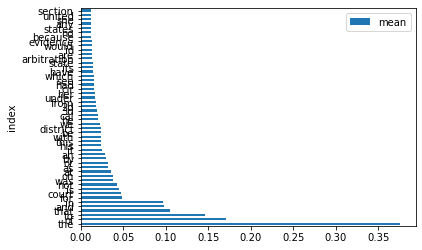

In [39]:
relevant_words_trans_sort_for_plot[0:50].plot(kind='barh')

# create function to do this when i need.

In [55]:
def common_words_charts(frame,name='no name',listOfwordsDict=None):
    new_frame=frame.mean().sort_values(ascending=False).reset_index()
    for_plot_in_func=pd.DataFrame(columns=new_frame['index'])
    for_plot_in_func=for_plot_in_func.T
    for_plot_in_func['mean']=0
    
    for inde,word in enumerate(for_plot_in_func['mean']):
        for_plot_in_func.iloc[inde]=new_frame.loc[inde][1:2][0]
        
    if listOfwordsDict==None:
    
        for_plot_in_func[0:50].plot(kind='barh',figsize=(20, 20),title=name)
    else:
        
        listOfwordsDict[name]=for_plot_in_func[0:50]
    
    

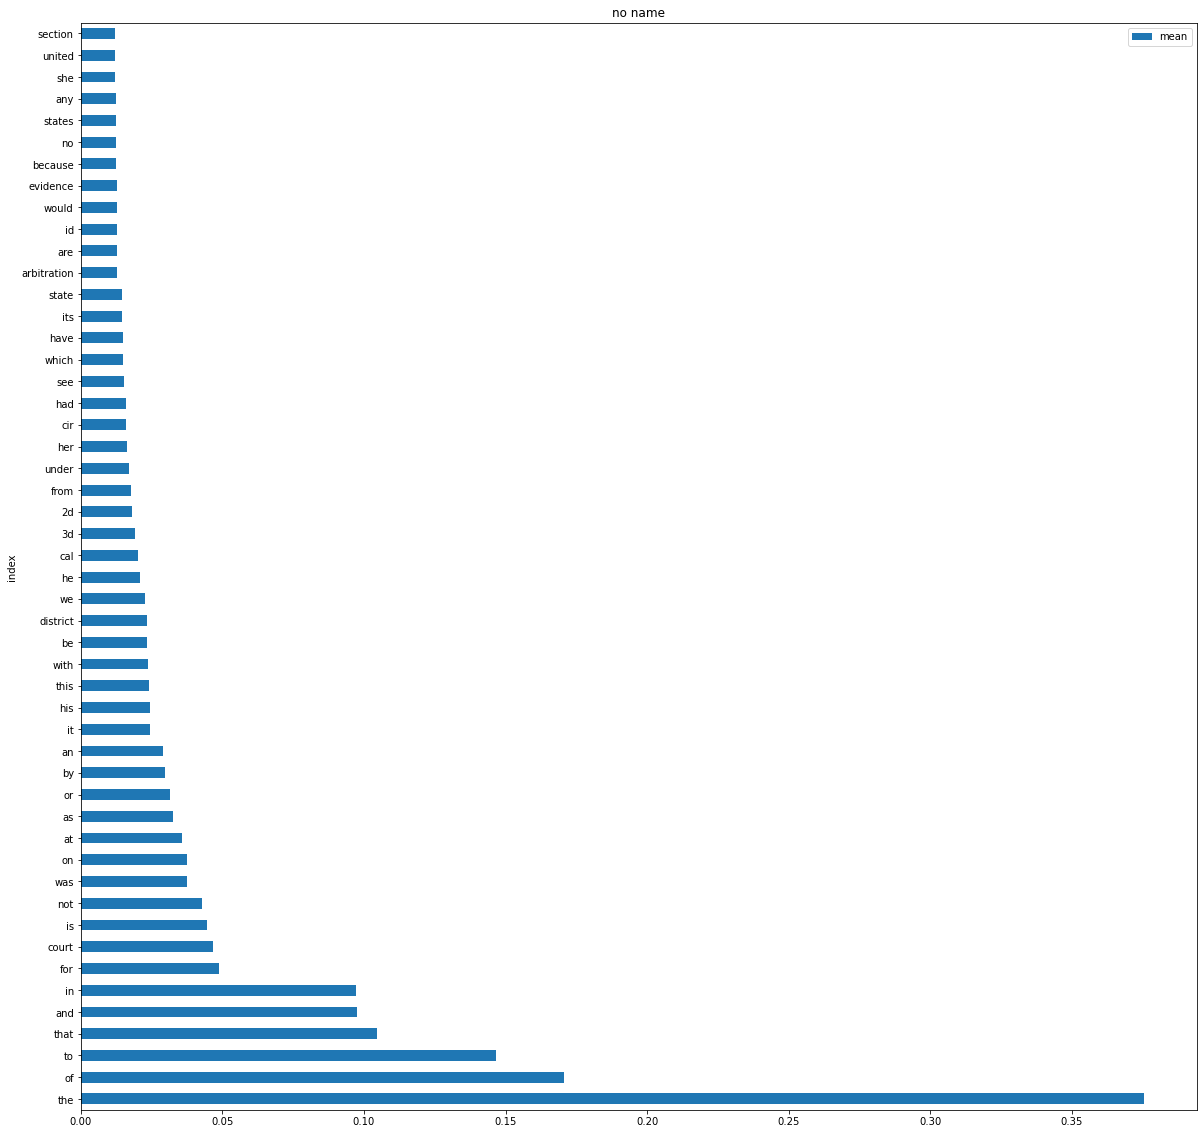

In [31]:
common_words_charts(relevant)

# most common word by legal catagory

this is the dataframe from earlier in code to use data_frame20

In [33]:
data_frame20['case_type'].unique().tolist()

[' Immigration Law',
 ' Insurance Law',
 ' Habeas Corpus',
 ' Health Law',
 ' Family Law',
 ' Contracts',
 ' Administrative Law',
 " Attorney's Fees",
 ' Sentencing',
 ' Environmental Law',
 ' Injury &amp; Tort Law',
 ' Tax Law',
 ' Bankruptcy Law',
 ' Education Law',
 ' Evidence',
 ' Remedies',
 ' Dispute Resolution &amp; Arbitration',
 ' Government Benefits',
 ' Commercial Law',
 ' Civil Procedure']

In [34]:
data_frame20_unique=data_frame20['case_type'].unique().tolist()

### import lex nlp

In [35]:
import lexnlp.nlp.en.tokens

In [29]:
law_type_df[law_type_df.case_type==' Evidence']

,case_text,case_type
15032,Narcotics detective Douglas Fackrell conducted...,Evidence
15033,While conducting an offshore inspection of a c...,Evidence
15034,"Per Curiam.\n In this case, the Court...",Evidence
15035,Sharon Bowles appeals her conviction after jur...,Evidence
15036,Defendant Paul Ryan Douglas appeals from an am...,Evidence
...,...,...
15939,Defendant Horatio Hamilton appeals from the ju...,Evidence
15940,Defendant appeals from a judgment of convictio...,Evidence
15941,Defendant-appellant (“defendant”) appeals from...,Evidence
15942,Harold Klump appeals from a judgment of convic...,Evidence


In [36]:
def clean_by_case_data(case,dataset_infunc):
    
    textdata=dataset_infunc['case_text']
    target = dataset_infunc['case_type']
    processed_data= [lexnlp.nlp.en.tokens.get_token_list(d, lowercase=True, stopword=True) for d in textdata.tolist()]
    
    sw_list = stopwords.words('english')
    sw_list += list(string.punctuation)
    sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©','-', '–', '—','()','( )','(']
    sw_set = set(sw_list)
    
    lemmatizer = WordNetLemmatizer() 

    lemmatized_output = []

    for listy in processed_data:
        lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
        lemmatized_output.append(lemmed)
        
    into_vectorx = lemmatized_output
   

    tfidf = TfidfVectorizer(stop_words=sw_set,min_df=0.1)
    tfidf_data_train_lem = tfidf.fit_transform(into_vectorx)
    
    return tfidf_data_train_lem,tfidf;

In [37]:
test1,test2=clean_by_case_data(1,law_type_df[law_type_df.case_type==' Evidence'])


In [52]:
new_frame=wappe.mean().sort_values(ascending=False).reset_index()
new_frame

NameError: name 'wappe' is not defined

In [ ]:
for inforcase in data_frame20_unique:
    framefor,tfmodel=clean_by_case_data(1,law_type_df[law_type_df.case_type==inforcase])
    
    wappe=pd.DataFrame(framefor.toarray(),columns=tfmodel.get_feature_names())
    

In [39]:
wappe.columns

Index(['00', '000', '0000', '000005', '00005', '0000666', '0001', '00014',
       '000323dft', '0007',
       ...
       'zuniga', 'zurcher', 'zurek', 'zurich', 'zurko', 'zuspann', 'zvi',
       'zwerling', 'zyl', 'être'],
      dtype='object', length=43477)

,00,000,01,02,03,04,05,06,07,09,...,wright,writing,written,wrong,wrongful,wrote,year,years,yet,york
0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.011490,0.000000,0.009968,0.005893,0.0,0.065997,0.005807,0.000000,0.005209
1,0.00000,0.047097,0.0,0.0,0.008136,0.0,0.000000,0.000000,0.008136,0.0,...,0.014458,0.000000,0.010994,0.000000,0.000000,0.0,0.032861,0.000000,0.015214,0.000000
2,0.01517,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.013856,0.014622,0.010536,0.012684,0.000000,0.0,0.062987,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.010348,0.000000,0.015738,0.000000,0.000000,0.0,0.015681,0.011038,0.000000,0.000000
4,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.010671,0.000000,0.0,...,0.009784,0.000000,0.007440,0.008956,0.000000,0.0,0.004942,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,0.00000,0.013813,0.0,0.0,0.000000,0.0,0.021389,0.000000,0.000000,0.0,...,0.000000,0.000000,0.014510,0.017467,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
705,0.00000,0.022835,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.047797,0.000000,0.000000,0.000000
706,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.041616,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
707,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.015142,0.000000,0.000000,0.0,0.030173,0.000000,0.000000,0.000000


In [ ]:
for inforcase in data_frame20_unique:
    framefor,tfmodel=clean_by_case_data(1,law_type_df[law_type_df.case_type==inforcase])
    
    wappe=pd.DataFrame(framefor.toarray(),columns=tfmodel.get_feature_names())
    common_words_charts(wappe,inforcase)

In [56]:
dictforrelevantsForPlot={}
for inforcase in data_frame20_unique:
    framefor,tfmodel=clean_by_case_data(1,law_type_df[law_type_df.case_type==inforcase])
    
    wappe=pd.DataFrame(framefor.toarray(),columns=tfmodel.get_feature_names())
    common_words_charts(wappe,inforcase,dictforrelevantsForPlot)

In [57]:
dictforrelevantsForPlot

{' Immigration Law':                  mean
 index                
 ij           0.101831
 bia          0.092641
 3d           0.080896
 court        0.068759
 state        0.068358
 persecution  0.066671
 asylum       0.064388
 cir          0.061231
 united       0.058781
 removal      0.055917
 alien        0.053595
 see          0.051621
 petitioner   0.050868
 evidence     0.049572
 immigration  0.048825
 motion       0.044234
 conviction   0.044204
 review       0.043732
 district     0.040498
 decision     0.040409
 government   0.040309
 application  0.039974
 would        0.038523
 offense      0.038167
 case         0.037069
 claim        0.037029
 id           0.037022
 crime        0.033996
 order        0.033237
 petition     0.033107
 reopen       0.032919
 also         0.032774
 statute      0.030530
 relief       0.030178
 testimony    0.029572
 fear         0.029318
 2d           0.029202
 law          0.028578
 whether      0.028510
 felony       0.028263
 section      

In [58]:
import pickle
pickle.dump(dictforrelevantsForPlot, open('dictOfRelevantwords','wb'))

In [60]:
pickledwords=pickle.load(open('dictOfRelevantwords','rb'))

In [54]:
pd.DataFrame(test1.toarray(),columns=test2.get_feature_names())

,00,000,00001,00003,00009,00017,0002,00025,00031,00033,...,zyprexa,álvarez,álvaro,ángel,ánibal,åd,åtæi,être,ñaña,ñxå7åæå37
0,0.000000,0.015506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.002156,0.004943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0.000000,0.022531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
908,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
909,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
910,0.000000,0.028164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# end of EDA